In [3]:
!pip install wordcloud


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/75/7a/cad3b21a91cc55abe06f70146b564f20d9db2aee9631fdee580283bd5e1e/wordcloud-1.9.3-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.0 kB ? eta -:--:--
   ----- --------------------------------- 41.0/300.0 kB 653.6 kB/s eta 0:00:01
   -------------------- ------------------- 153.6/300.0 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 300.0/300.0 kB 2.3 MB/s eta 0:00:00


0       Here’s the original: <a href="https://x.com/bo...
1                                 What an eye opener.....
2       This is amazing. <br><br>Do not yield to the a...
3                                                       .
4       Don&#39;t let somebody else pick your friends ...
                              ...                        
8084                         He whopped WEF&#39;s asses 😂
8085    no time for a 20min video at the moment, could...
8086             Agree 100% Spread this Ike wildfire!!!!!
8087                                        Thanks Farzad
8088                                     Tesla Cybertruck
Name: comment, Length: 8089, dtype: object
-----------------------------------------------
0       heres the original  the ai edited version usin...
1                                      what an eye opener
2       this is amazing do not yield to the advance of...
3                                                        
4       dont let somebody else pick you

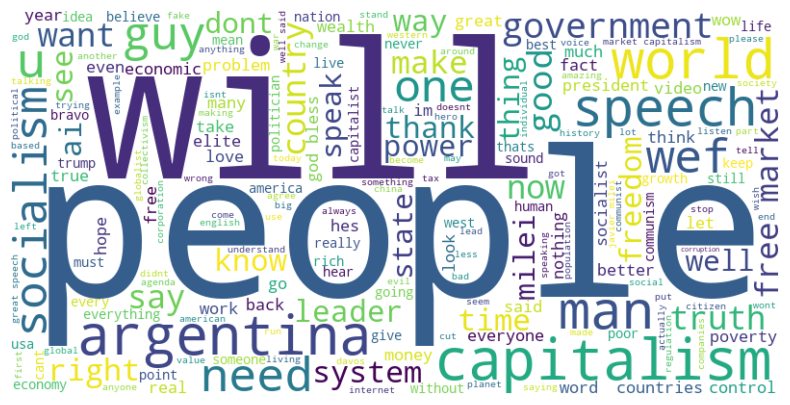

In [16]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
import html

# Leer el archivo CSV
df = pd.read_csv("E:\ITBA\Electivas\Procesamiento de Lenguaje Natural\TPE-NLP\dataset\comments.csv")

# Convertir los valores de la columna 'comment' a cadenas de texto
df['comment'] = df['comment'].astype(str)

print(df['comment'])

#TODO ver que onda si hay que filtrar algo mas

# Función para limpiar los comentarios
def clean_comment(comment):
    # Decodificar entidades HTML
    comment = html.unescape(comment)
    # Eliminar etiquetas HTML
    comment = re.sub(r'<.*?>', '', comment)
    # Eliminar caracteres especiales y entidades HTML restantes
    comment = re.sub(r'&\w+;', '', comment)
    # Eliminar enlaces
    comment = re.sub(r'http\S+', '', comment)
    # Eliminar caracteres de puntuación y números
    comment = re.sub(r'[^\w\s]', '', comment)
    # Convertir a minúsculas
    comment = comment.lower()
    return comment

# Limpiar los comentarios
df['clean_comment'] = df['comment'].apply(clean_comment)

print("-----------------------------------------------")
print(df['clean_comment'])

# Concatenar todos los comentarios en un solo string
all_comments = " ".join(df['clean_comment'])

# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Mostrar la imagen del WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

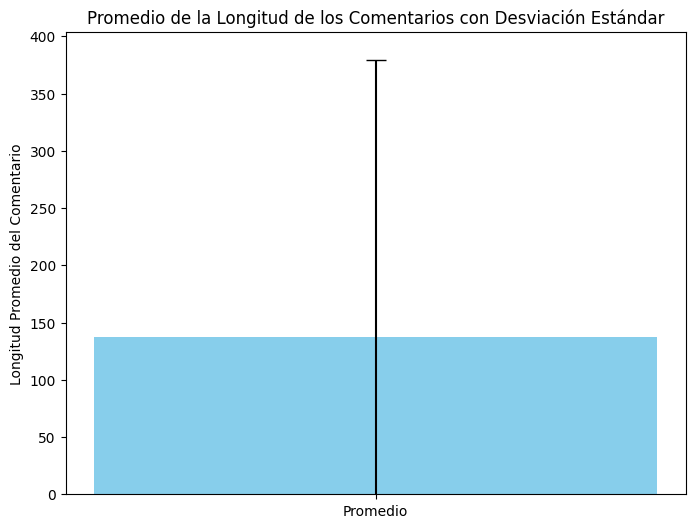

In [22]:
# Calcular la longitud de cada comentario en caracteres
df['comment_length'] = df['clean_comment'].apply(len)

# Calcular el promedio y la desviación estándar de la longitud de los comentarios
avg_length = df['comment_length'].mean()
std_length = df['comment_length'].std()

# Graficar el promedio y la desviación estándar de la longitud de los comentarios
plt.figure(figsize=(8, 6))
plt.bar(['Promedio'], [avg_length], yerr=std_length, color='skyblue', capsize=7)
plt.ylim(0, None)  # Ajustar el límite inferior del eje y a 0
plt.ylabel('Longitud Promedio del Comentario')
plt.title('Promedio de la Longitud de los Comentarios con Desviación Estándar')
plt.show()